Дипломная работа по курсу «Python для анализа данных»

Загрузить файл hr.csv (можно найти во вложении к заданию)

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

Рассчитать и визуализировать корреляционную матрицу для переменных

Визуализировать несколько взаимосвязей между переменными

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Рассчитать сколько работников работает в каждом департаменте

Показать распределение сотрудников по зарплатам

Показать распределение сотрудников по зарплатам совместно с департаментами

Сколько сотрудников покинули компанию

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics


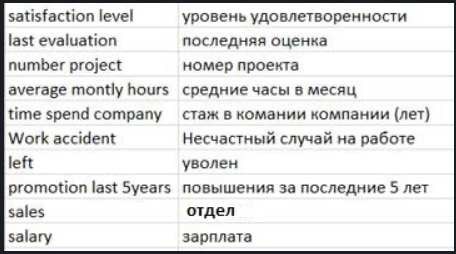

In [2]:
from IPython.display import Image
Image('discr.png', width=300)

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) # проверка наличия NaN значений

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
# или так 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# или так 
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

**Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)**

Основные статистики для всех переменных:

In [27]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Или так - основные статистики для каждой из переменных:

In [8]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание satisfaction_level: ',statistics.mean(df['satisfaction_level']))
# Медиана
print('Медиана satisfaction_level: ', statistics.median(df['satisfaction_level']))
# Мода
print('Мода satisfaction_level: ', statistics.mode(df['satisfaction_level']))
# Минимум
print('Минимум satisfaction_level: ',min(df['satisfaction_level']))
# Максимум
print('Максимум satisfaction_level: ',max(df['satisfaction_level']))
# Стандартное отклонение
print('Стандартное отклонение satisfaction_level: ',statistics.pstdev(df['satisfaction_level']))
# Дисперсия
print('Дисперсия satisfaction_level: ',statistics.pvariance(df['satisfaction_level']))

Математичесоке ожидание satisfaction_level:  0.6128335222348157
Медиана satisfaction_level:  0.64
Мода satisfaction_level:  0.1
Минимум satisfaction_level:  0.09
Максимум satisfaction_level:  1.0
Стандартное отклонение satisfaction_level:  0.2486223626820733
Дисперсия satisfaction_level:  0.061813079225616394


In [9]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание last_evaluation: ',statistics.mean(df['last_evaluation']))
# Медиана
print('Медиана last_evaluation: ', statistics.median(df['last_evaluation']))
# Мода
print('Мода last_evaluation: ', statistics.mode(df['last_evaluation']))
# Минимум
print('Минимум last_evaluation: ',min(df['last_evaluation']))
# Максимум
print('Максимум last_evaluation: ',max(df['last_evaluation']))
# Стандартное отклонение
print('Стандартное отклонение last_evaluation: ',statistics.pstdev(df['last_evaluation']))
# Дисперсия
print('Дисперсия last_evaluation: ',statistics.pvariance(df['last_evaluation']))

Математичесоке ожидание last_evaluation:  0.7161017401160077
Медиана last_evaluation:  0.72
Мода last_evaluation:  0.55
Минимум last_evaluation:  0.36
Максимум last_evaluation:  1.0
Стандартное отклонение last_evaluation:  0.1711634045107436
Дисперсия last_evaluation:  0.029296911043708445


In [10]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание number_project: ',statistics.mean(df['number_project']))
# Медиана
print('Медиана number_project: ', statistics.median(df['number_project']))
# Мода
print('Мода number_project: ', statistics.mode(df['number_project']))
# Минимум
print('Минимум number_project: ',min(df['number_project']))
# Максимум
print('Максимум number_project: ',max(df['number_project']))
# Стандартное отклонение
print('Стандартное отклонение number_project: ',statistics.pstdev(df['number_project']))
# Дисперсия
print('Дисперсия number_project: ',statistics.pvariance(df['number_project']))

Математичесоке ожидание number_project:  3.80305353690246
Медиана number_project:  4
Мода number_project:  4
Минимум number_project:  2
Максимум number_project:  7
Стандартное отклонение number_project:  1.2325512654823438
Дисперсия number_project:  1.5191826220421274


In [11]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание average_montly_hours: ',statistics.mean(df['average_montly_hours']))
# Медиана
print('Медиана average_montly_hours: ', statistics.median(df['average_montly_hours']))
# Мода 'no unique mode; found 2 equally common values' моду найти нельзя, тк есть два значения с равной величиной распределения
print('Мода average_montly_hours: no unique mode; found 2 equally common values')
# Минимум
print('Минимум average_montly_hours: ',min(df['average_montly_hours']))
# Максимум
print('Максимум average_montly_hours: ',max(df['average_montly_hours']))
# Стандартное отклонение
print('Стандартное отклонение average_montly_hours: ',statistics.pstdev(df['average_montly_hours']))
# Дисперсия
print('Дисперсия average_montly_hours: ',statistics.pvariance(df['average_montly_hours']))

Математичесоке ожидание average_montly_hours:  201.0503366891126
Медиана average_montly_hours:  200
Мода average_montly_hours: no unique mode; found 2 equally common values
Минимум average_montly_hours:  96
Максимум average_montly_hours:  310
Стандартное отклонение average_montly_hours:  49.94143446256218
Дисперсия average_montly_hours:  2494.146876178393


In [12]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание time_spend_company: ',statistics.mean(df['time_spend_company']))
# Медиана
print('Медиана time_spend_company: ', statistics.median(df['time_spend_company']))
# Мода
print('Мода time_spend_company: ', statistics.mode(df['time_spend_company']))
# Минимум
print('Минимум time_spend_company: ',min(df['time_spend_company']))
# Максимум
print('Максимум time_spend_company: ',max(df['time_spend_company']))
#  Стандартное отклонение
print('Стандартное отклонение time_spend_company: ',statistics.pstdev(df['time_spend_company']))
# Дисперсия
print('Дисперсия time_spend_company: ',statistics.pvariance(df['time_spend_company']))

Математичесоке ожидание time_spend_company:  3.498233215547703
Медиана time_spend_company:  3
Мода time_spend_company:  3
Минимум time_spend_company:  2
Максимум time_spend_company:  10
Стандартное отклонение time_spend_company:  1.4600875552715114
Дисперсия time_spend_company:  2.1318556690587385


In [13]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание Work_accident: ',statistics.mean(df['Work_accident']))
# Медиана
print('Медиана Work_accident: ', statistics.median(df['Work_accident']))
# Мода
print('Мода Work_accident: ', statistics.mode(df['Work_accident']))
# Минимум
print('Минимум Work_accident: ',min(df['Work_accident']))
# Максимум
print('Максимум Work_accident: ',max(df['Work_accident']))
# Стандартное отклонение
print('Стандартное отклонение Work_accident: ',statistics.pstdev(df['Work_accident']))
# Дисперсия
print('Дисперсия Work_accident: ',statistics.pvariance(df['Work_accident']))

Математичесоке ожидание Work_accident:  0.1446096406427095
Медиана Work_accident:  0
Мода Work_accident:  0
Минимум Work_accident:  0
Максимум Work_accident:  1
Стандартное отклонение Work_accident:  0.3517068274513532
Дисперсия Work_accident:  0.12369769247589593


In [14]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание left: ',statistics.mean(df['left']))
# Медиана
print('Медиана left: ', statistics.median(df['left']))
# Мода
print('Мода left: ', statistics.mode(df['left']))
# Минимум
print('Минимум left: ',min(df['left']))
# Максимум
print('Максимум left: ',max(df['left']))
# Стандартное отклонение
print('Стандартное отклонение left: ',statistics.pstdev(df['left']))
# Дисперсия
print('Дисперсия left: ',statistics.pvariance(df['left']))

Математичесоке ожидание left:  0.2380825388359224
Медиана left:  0
Мода left:  0
Минимум left:  0
Максимум left:  1
Стандартное отклонение left:  0.42590990072709495
Дисперсия left:  0.1813992435373639


In [15]:
# Математичесоке ожидание (среднее значение случайной величины)
print('Математичесоке ожидание promotion_last_5years: ',statistics.mean(df['promotion_last_5years']))
# Медиана
print('Медиана promotion_last_5years: ', statistics.median(df['promotion_last_5years']))
# Мода
print('Мода promotion_last_5years: ', statistics.mode(df['promotion_last_5years']))
# Минимум
print('Минимум promotion_last_5years: ',min(df['promotion_last_5years']))
# Максимум
print('Максимум promotion_last_5years: ',max(df['promotion_last_5years']))
 # Стандартное отклонение
print('Стандартное отклонение promotion_last_5years: ',statistics.pstdev(df['promotion_last_5years']))
# Дисперсия
print('Дисперсия promotion_last_5years: ',statistics.pvariance(df['promotion_last_5years']))

Математичесоке ожидание promotion_last_5years:  0.021268084538969265
Медиана promotion_last_5years:  0
Мода promotion_last_5years:  0
Минимум promotion_last_5years:  0
Максимум promotion_last_5years:  1
Стандартное отклонение promotion_last_5years:  0.14427665479561314
Дисперсия promotion_last_5years:  0.02081575311901252


**Рассчитать и визуализировать корреляционную матрицу для переменных**

In [21]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


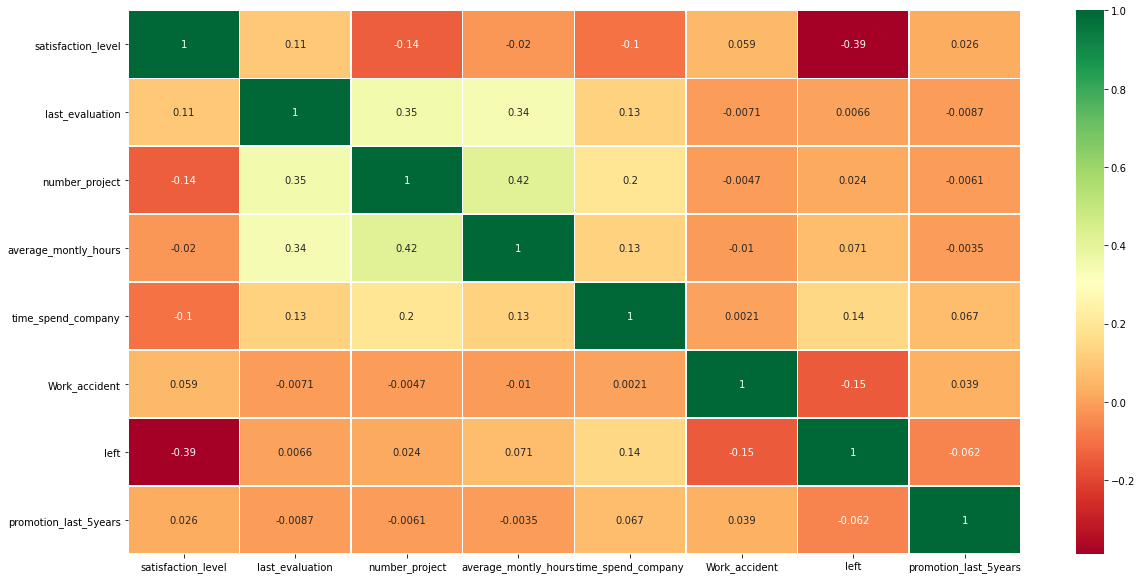

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.4) 

fig=plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

Из корреляционной матрицы видно, что не прослеживается линейная зависимость между попарно взятыми признаками исходной таблицы данных.

**Визуализировать несколько взаимосвязей между переменными**

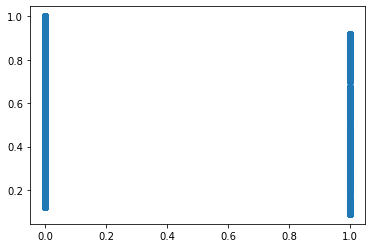

In [7]:
# выбирая переменные попарно 
plt.scatter(df.left, df.satisfaction_level)
plt.show()

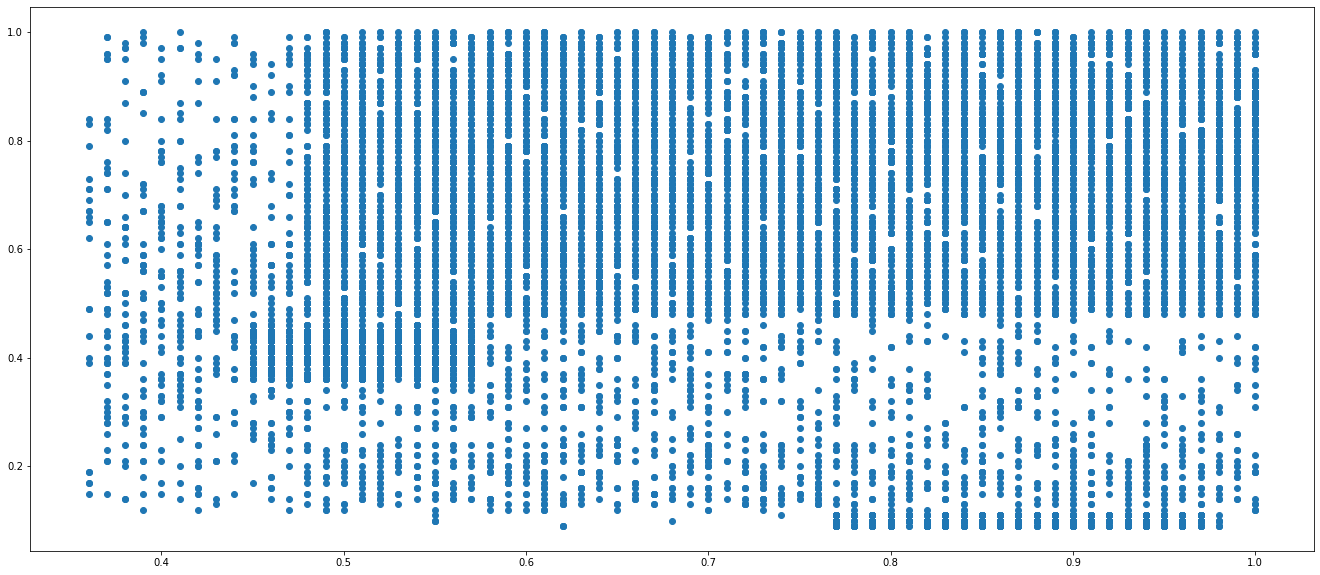

In [26]:
plt.scatter(df.last_evaluation, df.satisfaction_level)
plt.show()

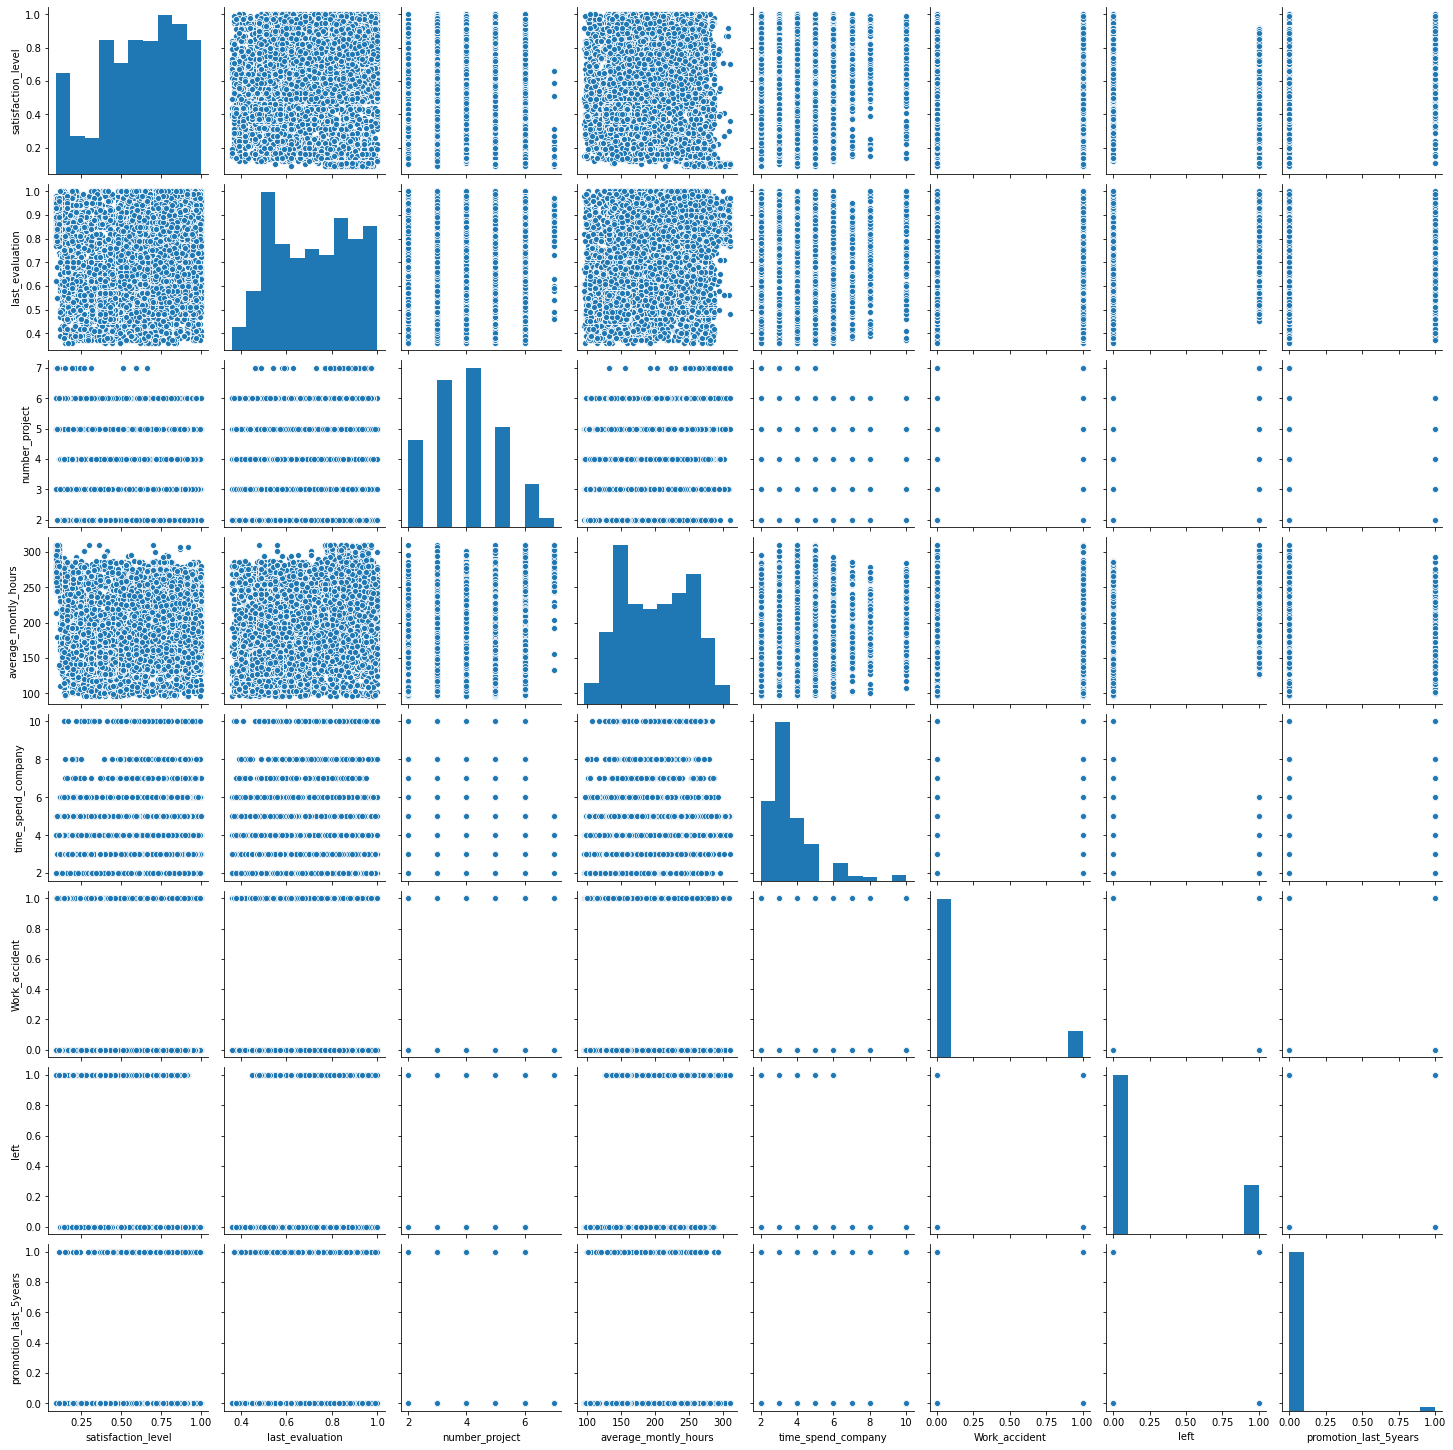

In [19]:
# или все сразу
sns_plot = sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']])
    
sns_plot

Ничего похожего на линейную зависимость тут не наблюдается, поэтому метод линейной регрессии применить не получится.

**С использованием t-test статистики проверить взаимосвязи между несколькими переменными**

T-критерий для двух независимых выборок (двухвыборочный t-критерий) проверяет гипотезу о равенстве средних в двух выборках

 Условия применения t-test  статистики:
 - Наблюдения в каждой выборке независимы. 
 - Наблюдения в каждой выборке распределены нормально.
 - Наблюдения в каждой выборке имеют одинаковую дисперсию.
 
Примечание: t-критерий предполагает, что средние значения различных выборок распределены нормально; он не предполагает, что популяция распределена нормально.

Согласно центральной предельной теореме, средние выборки из популяции с конечной дисперсией приближаются к нормальному распределению независимо от распределения популяции. Эмпирические правила говорят, что средние значения выборки в основном нормально распределены до тех пор, пока размер выборки составляет по крайней мере 20 или 30. Для того чтобы Т-критерий был справедлив для выборки меньшего размера, распределение популяции должно быть приблизительно нормальным.

T-критерий недействителен для малых выборок из ненормальных распределений, но он действителен для больших выборок из ненормальных распределений. 
 


В предоставленных данных непрерывными величинами являются только две: satisfaction_level и	last_evaluation, это значит, что делать выборки и проверять их на нормальность распределения имеет смысл только по значениям этих столбцов; другие заведомо будут распределены не нормально(они дискретны).

Гипотеза 1. Оценки сотрудников отдела продаж не имеют существенного отличия от оценок сотрудников HR

In [700]:
eval_sales = df[df['sales']=='sales']['last_evaluation']
eval_hr = df[df['sales']=='hr']['last_evaluation']

In [701]:
sts.shapiro(eval_sales)

(0.9531939625740051, 1.7274893936072743e-34)

In [702]:
sts.shapiro(eval_hr)

(0.9444900751113892, 5.19853236487526e-16)

p-value < 0.05 говорит о том, что распределения значений не является нормальным (при альфа=0.05) --> нужно брать выборки достаточного размера, чтобы Т-критерий был действителен.

In [697]:
len(eval_sales), len(eval_hr)

(4140, 739)

In [673]:
eval_sales = eval_sales.sample(30)
eval_hr = eval_hr.sample(30)

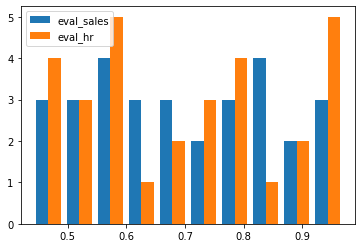

In [674]:
plt.hist([eval_sales, eval_hr], bins = 10, label=['eval_sales', 'eval_hr'])
plt.legend(loc='upper left')
plt.show()

Визуально распределение выборки не похоже на нормальное, но проверим это с помощью теста на нормальность Шапиро-Уилка (альфа=0.05)

In [675]:
sts.shapiro(eval_sales)

(0.9363583922386169, 0.0725981742143631)

In [676]:
sts.shapiro(eval_hr)

(0.9336997270584106, 0.06161757931113243)

p>0.05 --> принимаем нулевую гипотезу о нормальности распределения.

В предположении, что нормальность сохраняется и для других выборок (на самом деле, нет, но и выборок по другим признакам с нормальным распределением не нашла, поэтому покажу алгоритм, если того требует задание), считаем дисперсии:

In [677]:
statistics.variance(eval_sales), statistics.variance(eval_hr)

(0.025108505747126433, 0.027694712643678163)

Проверим гипотезу с помощью Т-критерия Стьюдента

In [680]:
sts.ttest_ind(eval_sales, eval_hr)

Ttest_indResult(statistic=5.292619296812965e-15, pvalue=0.9999999999999958)

p-value > 0.05 нулевую гипотезу принимаем.
Поскольку условие нормальности не было выполнено, то достоверность результатов теста сомнительна.

Проверим гипотезу тестом Манна-Уитни (в представленных выборках больше 3 значений по каждому из признаков и их повторяемость невысока (<=5), то есть условия для применения теста соблюдены)

In [681]:
sts.mannwhitneyu(eval_sales, eval_hr)

MannwhitneyuResult(statistic=447.5, pvalue=0.48820070054975134)

p-value > 0.05 нулевую гипотезу принимаем

Гипотеза 2. Уровень удовлетворенности сотрудников с высокой оценкой такой же, как у сотрудников с низкой.

In [421]:
satisfaction_high = df[df['last_evaluation']>0.5]['satisfaction_level']
satisfaction_low = df[df['last_evaluation'] <= 0.5]['satisfaction_level']

In [422]:
len(satisfaction_high), len(satisfaction_low)

(13078, 1921)

In [423]:
satisfaction_high = satisfaction_high.sample(30)
satisfaction_low = satisfaction_low.sample(30)

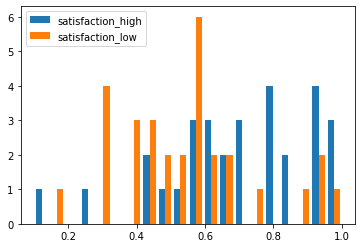

In [424]:
plt.hist([satisfaction_high, satisfaction_low], bins = 20, label=['satisfaction_high', 'satisfaction_low'])
plt.legend(loc='upper left')
plt.show()

In [425]:
sts.shapiro(satisfaction_high)

(0.9445540308952332, 0.12066707015037537)

In [426]:
sts.shapiro(satisfaction_low)

(0.9520518779754639, 0.1918109804391861)

Тест Шапиро-Уилка показывает, что распределение в каждой из выборок является нормальным (если делать другие выборки, то нет)

In [427]:
statistics.variance(satisfaction_high), statistics.variance(satisfaction_low)

(0.04654724137931035, 0.04231137931034483)

In [428]:
sts.ttest_ind(satisfaction_high, satisfaction_low)  

Ttest_indResult(statistic=2.7193966546345028, pvalue=0.008614152103709456)

p-value < 0.05 нулевую гипотезу отвергаем, принимаем альтернативную о том, что уровень удовлетворенности сотрудников с высокой и низкой оценкой отличается

**Рассчитать сколько работников работает в каждом департаменте**

In [194]:
df_dep = df.groupby('sales').agg({'sales': ['count']})
df_dep

,sales
,count
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140


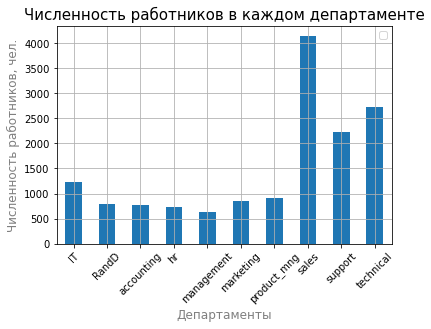

In [195]:
df_dep.plot.bar(rot = 45, grid = True)
plt.xlabel('Департаменты', fontsize = 12, color = 'grey')
plt.ylabel('Численность работников, чел.', fontsize = 12, color = 'grey')
plt.title('Численность работников в каждом департаменте', fontsize = 15)
plt.legend('')

**Показать распределение сотрудников по зарплатам**

In [243]:
# аналитическим способом + график
df_salary = df.groupby('salary').agg({'salary': ['count']})
df_salary

,salary
,count
salary,
high,1237
low,7316
medium,6446


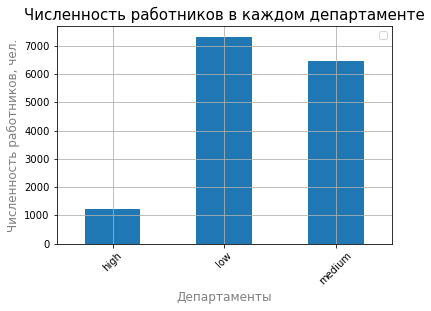

In [244]:
df_salary.plot.bar(rot = 45, grid = True)
plt.xlabel('Департаменты', fontsize = 12, color = 'grey')
plt.ylabel('Численность работников, чел.', fontsize = 12, color = 'grey')
plt.title('Численность работников в каждом департаменте', fontsize = 15)
plt.legend('')

In [254]:
# еще можно графическим способом

def repl(row):
    if row == 'high':
        row = 1
    elif row == 'medium':
        row = 2
    elif row == 'low':
        row = 3
    return row

df['salary1'] = df.salary.apply(repl)

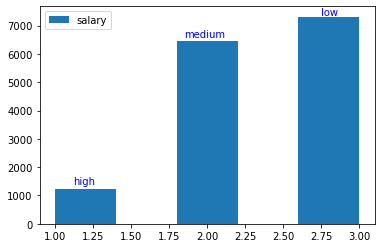

In [246]:
plt.hist(df['salary1'], bins = 5, label='salary')
plt.legend(loc='upper left')
plt.text(1.12, 1400, 'high', color='b')
plt.text(1.85, 6600, 'medium', color='b')
plt.text(2.75, 7355, 'low', color='b')
plt.show()

In [234]:
# df = df.drop('salary1', axis=1)
# df

**Показать распределение сотрудников по зарплатам совместно с департаментами**

In [200]:
df_grouped = df.groupby(['salary', 'sales']).agg({'salary': ['count']})
df_grouped

salary
                    count
salary sales             
high   IT              83
       RandD           51
       accounting      74
       hr              45
       management     225
       marketing       80
       product_mng     68
       sales          269
       support        141
       technical      201
low    IT             609
       RandD          364
       accounting     358
       hr             335
       management     180
       marketing      402
       product_mng    451
       sales         2099
       support       1146
       technical     1372
medium IT             535
       RandD          372
       accounting     335
       hr             359
       management     225
       marketing      376
       product_mng    383
       sales         1772
       support        942
       technical     1147

In [209]:
df_gr = df_grouped.reset_index()
df_gr.columns = ['salary', 'sales', 'salary_count']

df_salary_high = df_gr[df_gr['salary'] == 'high']
df_salary_high = df_salary_high[['sales', 'salary_count']]
df_salary_high.set_index('sales', inplace=True)

df_salary_medium = df_gr[df_gr['salary'] == 'medium']
df_salary_medium = df_salary_medium[['sales', 'salary_count']]
df_salary_medium.set_index('sales', inplace=True)

df_salary_low = df_gr[df_gr['salary'] == 'low']
df_salary_low = df_salary_low[['sales', 'salary_count']]
df_salary_low.set_index('sales', inplace=True)


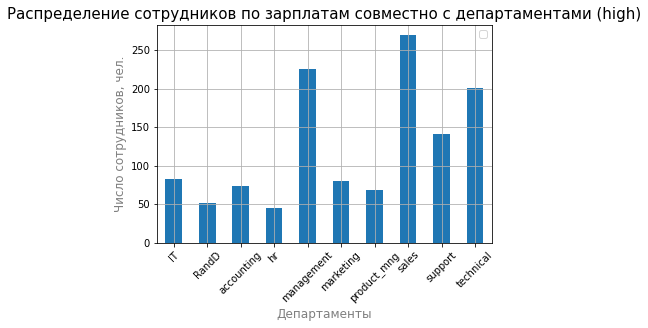

In [236]:
df_salary_high.plot.bar(rot = 45, grid = True)
plt.xlabel('Департаменты', fontsize = 12, color = 'grey')
plt.ylabel('Число сотрудников, чел.', fontsize = 12, color = 'grey')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами (high)', fontsize = 15)
plt.legend('')

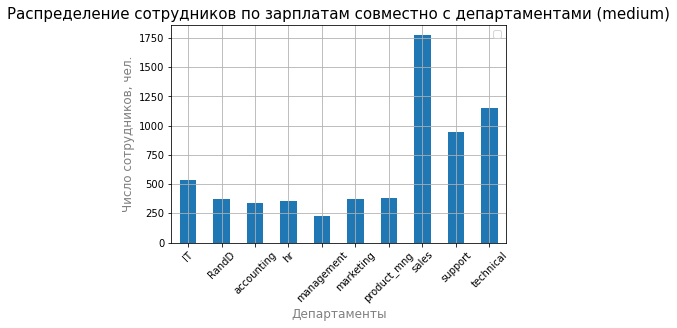

In [207]:
df_salary_medium.plot.bar(rot = 45, grid = True)
plt.xlabel('Департаменты', fontsize = 12, color = 'grey')
plt.ylabel('Число сотрудников, чел.', fontsize = 12, color = 'grey')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами (medium)', fontsize = 15)
plt.legend('')

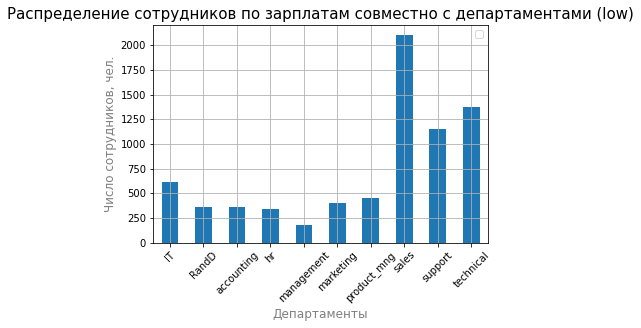

In [208]:
df_salary_low.plot.bar(rot = 45, grid = True)
plt.xlabel('Департаменты', fontsize = 12, color = 'grey')
plt.ylabel('Число сотрудников, чел.', fontsize = 12, color = 'grey')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами (low)', fontsize = 15)
plt.legend('')

In [180]:
# или можно по каждому департаменту смотреть зарплаты

df_grouped = df.groupby(['sales', 'salary']).agg({'salary': ['count']})
df_grouped

salary
                    count
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

**Сколько сотрудников покинули компанию**

In [181]:
df.left.sum()

3571

**Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию**

Гипотеза 1. Уровень удовлетворенности сотрудников, покинувших компанию, совпадает с уровнем удовлетворенности сотрудников продолжающих в ней работать

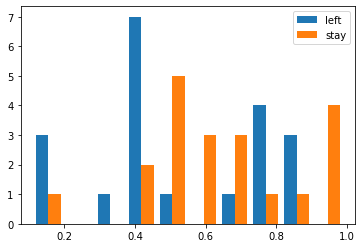

In [291]:
left = df[df["left"]==1]["satisfaction_level"]
stay = df[df["left"]==0]["satisfaction_level"]

left = left.sample(20)
stay = stay.sample(20)
plt.hist([left, stay], bins = 10, label=['left', 'stay'])
plt.legend(loc='upper right')
plt.show()

In [292]:
sts.shapiro(left)

(0.9179109334945679, 0.09032882750034332)

In [293]:
sts.shapiro(stay)

(0.9293127059936523, 0.14978311955928802)

Требования к выборкам для применения критерия Манна-Уитни.
    В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
    В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).
    Данные должны быть количественные или порядковые.

In [294]:
sts.mannwhitneyu(left, stay)

MannwhitneyuResult(statistic=134.0, pvalue=0.03811197468121376)

p-value < 0.05 нулевую гипотезу отвергаем, принимаем альтернативную о том, что уровень удовлетворенности у уволенных и работающих сотрудников отличается. На разных выборках резельтат повторяется. 


Гипотеза 2. Уровень последней оценки у уволенных и работающих сотрудников одинаковый

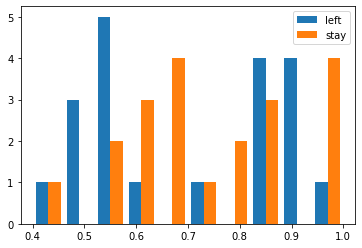

In [263]:
left = df[df["left"]==1]["last_evaluation"]
stay = df[df["left"]==0]["last_evaluation"]

left = left.sample(20)
stay = stay.sample(20)
plt.hist([left, stay], bins = 10, label=['left', 'stay'])
plt.legend(loc='upper right')
plt.show()

In [264]:
sts.shapiro(left)

(0.8391916155815125, 0.003531531197950244)

In [265]:
sts.shapiro(stay)

(0.9624646902084351, 0.5941778421401978)

In [266]:
statistics.variance(left), statistics.variance(stay)

(0.03764078947368421, 0.02827868421052631)

In [268]:
sts.mannwhitneyu(left, stay)

MannwhitneyuResult(statistic=166.0, pvalue=0.18230830307655438)

p-value > 0.05 нулевую гипотезу принимаем, то есть уровень оценки на увольнения не влияет.

Гипотеза 3. Зарплаты у уволенных и работающих сотрудников не отличаются

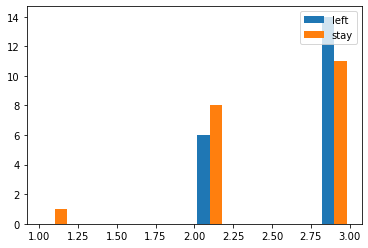

In [313]:
left = df[df['left']==1]['salary1']
stay = df[df['left']==0]['salary1']


left = left.sample(20)
stay = stay.sample(20)
plt.hist([left, stay], bins = 10, label=['left', 'stay'])
plt.legend(loc='upper right')
plt.show()

In [314]:
sts.mannwhitneyu(left, stay)

MannwhitneyuResult(statistic=167.0, pvalue=0.1489765308040839)

p-value > 0.05 нулевую гипотезу принимаем, уровень зарплаты на увольнения не влияет.